### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Calculamos el ingreso total (Precio) para cada tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

In [3]:
# Creamos un diccionario para organizar los datos
ingresos = {
    'Tienda 1': ingreso_tienda1,
    'Tienda 2': ingreso_tienda2,
    'Tienda 3': ingreso_tienda3,
    'Tienda 4': ingreso_tienda4
}

In [4]:
# Identificamos la tienda con menor facturación para usarla más adelante
tienda_menor_ingreso = min(ingresos, key=ingresos.get)
valor_menor_ingreso = ingresos[tienda_menor_ingreso]

print(f"Ingreso Total Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Ingreso Total Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Ingreso Total Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Ingreso Total Tienda 4: ${ingreso_tienda4:,.2f}")
print(f"\nLa tienda con menor facturación es: {tienda_menor_ingreso} con ${valor_menor_ingreso:,.2f}\n")

Ingreso Total Tienda 1: $1,150,880,400.00
Ingreso Total Tienda 2: $1,116,343,500.00
Ingreso Total Tienda 3: $1,098,019,600.00
Ingreso Total Tienda 4: $1,038,375,700.00

La tienda con menor facturación es: Tienda 4 con $1,038,375,700.00



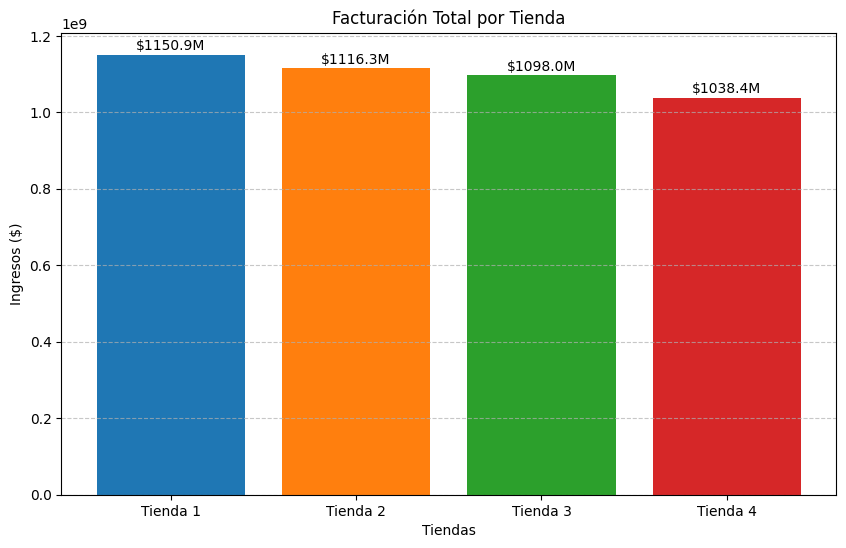

In [7]:
# importamos la biblioteca para visualización
import matplotlib.pyplot as plt

# Gráfico 1: Gráfico de Barras - Facturación Total por Tienda
tiendas = list(ingresos.keys())
valores_ingresos = list(ingresos.values())

plt.figure(figsize=(10, 6))
plt.bar(tiendas, valores_ingresos, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Facturación Total por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(valores_ingresos):
    plt.text(i, v + (max(valores_ingresos)*0.01), f"${v/1000000:.1f}M", ha='center')
plt.show()

# 2. Ventas por categoría

In [8]:
# Seleccionamos el DataFrame de la tienda con menor ingreso
if tienda_menor_ingreso == 'Tienda 1':
    df_analisis = tienda
elif tienda_menor_ingreso == 'Tienda 2':
    df_analisis = tienda2
elif tienda_menor_ingreso == 'Tienda 3':
    df_analisis = tienda3
else:
    df_analisis = tienda4

In [10]:
# Agrupamos por categoría y sumamos los precios (o contamos ventas, aquí usamos precio para ver impacto económico)
categorias_ventas = df_analisis.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

print(f"Categorías más vendidas (por ingreso) en {tienda_menor_ingreso}:")
print(categorias_ventas)
print("\n")

Categorías más vendidas (por ingreso) en Tienda 4:
Categoría del Producto
Electrónicos               409476100.0
Electrodomésticos          283260200.0
Muebles                    192528900.0
Instrumentos musicales      75102400.0
Deportes y diversión        33350100.0
Juguetes                    20262200.0
Artículos para el hogar     15074500.0
Libros                       9321300.0
Name: Precio, dtype: float64




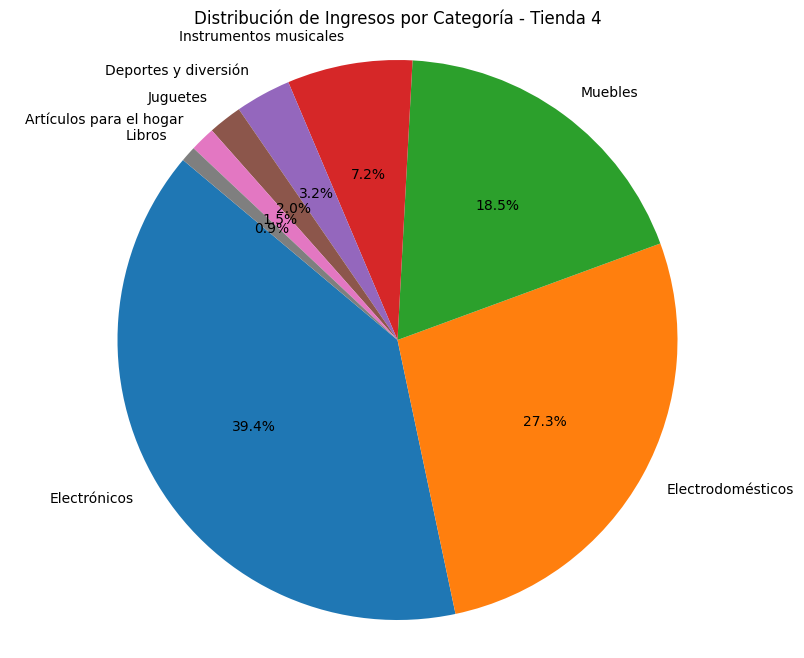

In [11]:
# Gráfico 2: Gráfico de Pastel - Distribución de Ventas por Categoría
plt.figure(figsize=(10, 8))
plt.pie(categorias_ventas, labels=categorias_ventas.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribución de Ingresos por Categoría - {tienda_menor_ingreso}')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

# 3. Calificación promedio de la tienda


In [12]:
# Calculamos el promedio de la columna 'Calificación'
calif_t1 = tienda['Calificación'].mean()
calif_t2 = tienda2['Calificación'].mean()
calif_t3 = tienda3['Calificación'].mean()
calif_t4 = tienda4['Calificación'].mean()

calificaciones = {
    'Tienda 1': calif_t1,
    'Tienda 2': calif_t2,
    'Tienda 3': calif_t3,
    'Tienda 4': calif_t4
}

print(f"Calificación Promedio Tienda 1: {calif_t1:.2f}")
print(f"Calificación Promedio Tienda 2: {calif_t2:.2f}")
print(f"Calificación Promedio Tienda 3: {calif_t3:.2f}")
print(f"Calificación Promedio Tienda 4: {calif_t4:.2f}\n")

Calificación Promedio Tienda 1: 3.98
Calificación Promedio Tienda 2: 4.04
Calificación Promedio Tienda 3: 4.05
Calificación Promedio Tienda 4: 4.00



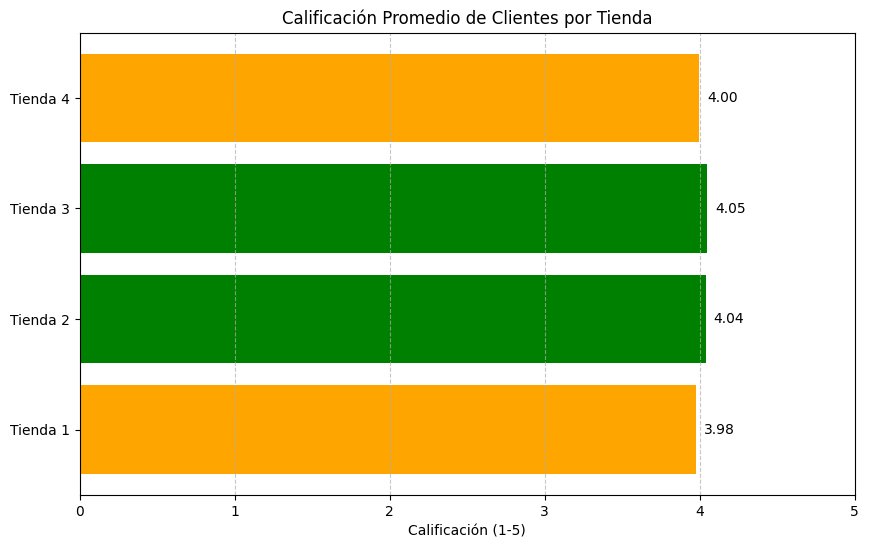

In [13]:
# Gráfico 3: Gráfico de Barras Horizontales - Calificación Promedio
nombres_calif = list(calificaciones.keys())
valores_calif = list(calificaciones.values())

plt.figure(figsize=(10, 6))
colores_calif = ['green' if c >= 4.0 else 'orange' for c in valores_calif]
plt.barh(nombres_calif, valores_calif, color=colores_calif)
plt.title('Calificación Promedio de Clientes por Tienda')
plt.xlabel('Calificación (1-5)')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, v in enumerate(valores_calif):
    plt.text(v + 0.05, i, f"{v:.2f}", va='center')
plt.show()

# 4. Productos más y menos vendidos

In [14]:
# Contamos la frecuencia de cada producto en la tienda analizada
conteo_productos = df_analisis.groupby('Producto').size().sort_values(ascending=False)

producto_mas_vendido = conteo_productos.idxmax()
cantidad_mas_vendido = conteo_productos.max()

producto_menos_vendido = conteo_productos.idxmin()
cantidad_menos_vendido = conteo_productos.min()

print(f"--- Análisis de Productos en {tienda_menor_ingreso} ---")
print(f"Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} ventas)")
print(f"Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendido} ventas)")
print("Top 5 productos más vendidos:")
print(conteo_productos.head(5))
print("\n")

--- Análisis de Productos en Tienda 4 ---
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)
Top 5 productos más vendidos:
Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
dtype: int64




# 5. Envío promedio por tienda

In [15]:
envio_t1 = tienda['Costo de envío'].mean()
envio_t2 = tienda2['Costo de envío'].mean()
envio_t3 = tienda3['Costo de envío'].mean()
envio_t4 = tienda4['Costo de envío'].mean()

print(f"Costo de Envío Promedio Tienda 1: ${envio_t1:,.2f}")
print(f"Costo de Envío Promedio Tienda 2: ${envio_t2:,.2f}")
print(f"Costo de Envío Promedio Tienda 3: ${envio_t3:,.2f}")
print(f"Costo de Envío Promedio Tienda 4: ${envio_t4:,.2f}")

Costo de Envío Promedio Tienda 1: $26,018.61
Costo de Envío Promedio Tienda 2: $25,216.24
Costo de Envío Promedio Tienda 3: $24,805.68
Costo de Envío Promedio Tienda 4: $23,459.46
